## Problem Statement : 
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import spacy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

import requests

from bs4 import BeautifulSoup as bs

from selenium import webdriver

from textblob import TextBlob

### Import Data

In [2]:
macbook_air=[] 

In [3]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac   

In [4]:
macbook_air

["\nBest in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n",
 "\nPros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compressions/co

In [5]:
len(macbook_air)

270

In [6]:
rev={"review":macbook_air}

In [7]:
reviews = pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [8]:
reviews

,review
0,"\nBest in class. Performance, Display, Battery backup are above excellent.A must have for every tech geekBought this after selling my Yamaha R15, but no regrets.... It's speed is better than R15. 😅\n"
1,"\nPros:-1. It's Superfast. It will feel fast on everything - from bootup, to app opening, to builds etc.2. It's slim. Air has no fan hence it's form factor is even slimmer than Pro.3. It remains cold even during heavy code builds. It's hard to find things which makes it warm actually.4. I have tried several graphics heavy games and they run great without any heat as well5. If you are just browsing with Wifi on, typically it loses 10% battery in 7-8 hours. But it's for Safari browser. It has achieved I guess what people will call power-efficiency nirvana.6. Screen, Sound and Mic quality are awesomeCons:-1. Since it's winters in India now, some people might not like that it doesn't heat up the surroundings2. For longer workloads - like if you are doing daily large video compressions/conv..."
2,"\nIf we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n"
3,"\nOrdered the M1 Air on 5th August and got it delivered on the 7th. Then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with M1 Macs. So I called up Apple and they offered me two options, either a new replacement Mac or full refund since mine is still under 14 days. As soon as I revealed that I purchased from Amazon, the Apple sales team said sorry they can't help me since Amazon is not Apple authorised seller.I'm never buying another Apple product from Amazon again. If you want the full Apple experience like seamless replacement, refund or after sales then you need to buy it from Apple or from any of its authorised sellers. I made a costly mistake hope others will not after reading this message.\n"
4,"\nSince the Macbook adapter is having only 2 pins, I am facing earthing issues and the laptop is giving shocks while charging. This is a very expensive laptop and Apple must provide a free 3 pin adapter to avoid earthing issues.\n"
...,...
265,\nCool\n
266,
267,\nFor an Indian consumer 2 lakh + for a laptop is not worth it. There are way better laptops at 80k and does the job really well. Still looking for a mac - you have MacBook Air that’s is mush lighter in weight and fast.\n
268,\nAmazing macbook. I loved it.\n


In [9]:
text=" ".join(reviews)

In [10]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
reviews["review"]=reviews["review"].apply(clean_text)

In [11]:
reviews

,review
0,"\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅\n"
1,"\npros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv..."
2,"\nif we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n"
3,"\nordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.\n"
4,"\nsince the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.\n"
...,...
265,\ncool\n
266,
267,\nfor an indian consumer 2 lakh + for a laptop is not worth it. there are way better laptops at 80k and does the job really well. still looking for a mac - you have macbook air that’s is mush lighter in weight and fast.\n
268,\namazing macbook. i loved it.\n


In [12]:
text=" ".join(reviews["review"])

In [13]:
text

'\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it\'s speed is better than r15. 😅\n \npros:-1. it\'s superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it\'s slim. air has no fan hence it\'s form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it\'s hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it\'s for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it\'s winters in india now, some people might not like that it doesn\'t heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions

In [14]:
text_tokens = word_tokenize(text)

In [15]:
text_tokens

['best',
 'in',
 'class',
 '.',
 'performance',
 ',',
 'display',
 ',',
 'battery',
 'backup',
 'are',
 'above',
 'excellent.a',
 'must',
 'have',
 'for',
 'every',
 'tech',
 'geekbought',
 'this',
 'after',
 'selling',
 'my',
 'yamaha',
 'r15',
 ',',
 'but',
 'no',
 'regrets',
 '....',
 'it',
 "'s",
 'speed',
 'is',
 'better',
 'than',
 'r15',
 '.',
 '😅',
 'pros',
 ':',
 '-1.',
 'it',
 "'s",
 'superfast',
 '.',
 'it',
 'will',
 'feel',
 'fast',
 'on',
 'everything',
 '-',
 'from',
 'bootup',
 ',',
 'to',
 'app',
 'opening',
 ',',
 'to',
 'builds',
 'etc.2',
 '.',
 'it',
 "'s",
 'slim',
 '.',
 'air',
 'has',
 'no',
 'fan',
 'hence',
 'it',
 "'s",
 'form',
 'factor',
 'is',
 'even',
 'slimmer',
 'than',
 'pro.3',
 '.',
 'it',
 'remains',
 'cold',
 'even',
 'during',
 'heavy',
 'code',
 'builds',
 '.',
 'it',
 "'s",
 'hard',
 'to',
 'find',
 'things',
 'which',
 'makes',
 'it',
 'warm',
 'actually.4',
 '.',
 'i',
 'have',
 'tried',
 'several',
 'graphics',
 'heavy',
 'games',
 'and',
 't

In [16]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [17]:
tf=TfidfVectorizer()
text_tf=tf.fit_transform(text_without_sw)

In [18]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [19]:
df

,000,10,100,10finally,10get,10hrs,10i,10light,10th,10watch,...,xps,yamaha,year,years,yes,yet,you,youtube,yrs,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
words_list=" ".join(df)

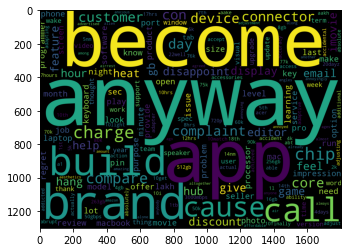

In [21]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)
plt.show()

In [22]:
with open ("C:/Users/Sai Theja/Desktop/Excelr/Assignments/Text Mining/positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [23]:
with open ("C:/Users/Sai Theja/Desktop/Excelr/Assignments/Text Mining/negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]

In [24]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [25]:
pos_text=" ".join([word for word in df if not word  in positive_words])

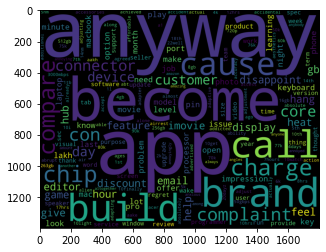

In [26]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)
plt.show()

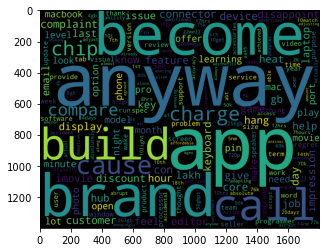

In [27]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)
plt.show()

In [28]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

reviews[["subjectivity", "polarity"]] = reviews.apply(sentiment_analysis, axis=1)
reviews

,review,subjectivity,polarity
0,"\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅\n",0.275000,0.387500
1,"\npros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566
2,"\nif we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n",0.804167,0.427083
3,"\nordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.\n",0.506818,0.033712
4,"\nsince the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.\n",0.903333,-0.083333
...,...,...,...
265,\ncool\n,0.650000,0.350000
266,,0.000000,0.000000
267,\nfor an indian consumer 2 lakh + for a laptop is not worth it. there are way better laptops at 80k and does the job really well. still looking for a mac - you have macbook air that’s is mush lighter in weight and fast.\n,0.350000,0.187500
268,\namazing macbook. i loved it.\n,0.850000,0.650000


In [29]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
reviews["analysis"] = reviews["polarity"].apply(analysis)
reviews

,review,subjectivity,polarity,analysis
0,"\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅\n",0.275000,0.387500,Positive
1,"\npros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",0.423249,0.064566,Positive
2,"\nif we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n",0.804167,0.427083,Positive
3,"\nordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.\n",0.506818,0.033712,Positive
4,"\nsince the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.\n",0.903333,-0.083333,Negative
...,...,...,...,...
265,\ncool\n,0.650000,0.350000,Positive
266,,0.000000,0.000000,Neutral
267,\nfor an indian consumer 2 lakh + for a laptop is not worth it. there are way better laptops at 80k and does the job really well. still looking for a mac - you have macbook air that’s is mush lighter in weight and fast.\n,0.350000,0.187500,Positive
268,\namazing macbook. i loved it.\n,0.850000,0.650000,Positive


In [30]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

In [31]:
from afinn import Afinn

In [32]:
afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['word', 'value']) #new column names

In [33]:
afinn_wl_df.sample(10)

,word,value
1183,hid,-1
991,fired,-2
907,exonerating,2
1887,resolved,2
558,daring,2
1308,injustice,-2
321,brisk,2
606,demand,-1
1679,passionate,2
1405,lack,-2


In [34]:
affinity_scores=afinn_wl_df.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

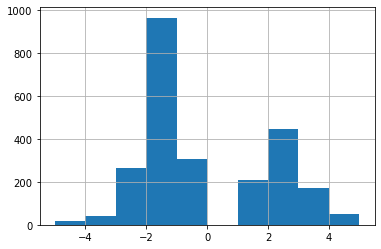

In [35]:
afinn_wl_df['value'].hist()
plt.show()

In [36]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [37]:
# manual testing
calculate_sentiment(text='gray')

-1

In [38]:
# Calculating sentiment value for each sentence
reviews['analysis']=reviews['analysis'].apply(calculate_sentiment)
reviews['analysis']

0      2
1      2
2      2
3      2
4     -2
      ..
265    2
266    0
267    2
268    2
269    2
Name: analysis, Length: 270, dtype: int64

In [39]:
# how many subjectivities are there in a review?
reviews['subjectivity']=reviews['review'].str.split().apply(len)
reviews['subjectivity']

0       32
1      232
2       20
3      142
4       41
      ... 
265      1
266      0
267     45
268      5
269      3
Name: subjectivity, Length: 270, dtype: int64

In [40]:
reviews.sort_values(by='analysis')

,review,subjectivity,polarity,analysis
71,"\nmy first mac, so far had no issues, in 15 days hanged once for 15 secs during shutdown, else everything is good. absolutely no noise and no heating. battery backup average 9-10 hours for moderate usage (browsing, movie, youtube, streaming etc). if pocket permits then you can have this blindly without even attempt to comparing with other pc.updates on 14th apr'22well! performance is still good but a big problem appeared in battery. randomly shutting down with 74% battery left without any warning. it doesn't turn on until i plug the power adapter. when the laptop opens it shows battery at 11% and takes very little time (10-15 mins) to reach 100% battery level. then after i unplug, from 100% to reach 74% it takes normal time (no abrupt drainage here), but once it goes around 74% it agai...",188,-0.033056,-2
28,\nthe customer service plays blame gamedon't ever think to buy costly products from the amazon websitemy laptop is under window period of replacement still customer service is not handling the problemsincerely.overall my experience was too bad.i just wasted my 78000 rs buying laptop from them.\n,45,-0.200000,-2
223,\nremains cold even after extensive usage\n,6,-0.300000,-2
118,\napplied for replacement and customer care made it but delivery person didn't complete the replacement due to some technical issues\n,20,-0.008333,-2
122,\nbase storage should be 512gb. and base ram should be 16gb for pricey device like macbook.\n,16,-0.800000,-2
...,...,...,...,...
108,\nincredible machine in terms of performance.the screen is unlikely another laptop out there crisp and vibrant.cons:webcam\n,16,0.216667,2
109,"\napple being apple, everything is excellent. however, i ordered spaceport but amazon delivered gold. as i got with good discount, i had to live with it.\n",26,0.612121,2
110,\ni like this better than pro. its travel friendly.\n,9,0.437500,2
149,"\nthe new macbook air with apple's m1 chip is a powerhouse for normal office use. combined with its elegant looks, close integration with ios, it's unmatched in its class.\n",29,0.262121,2


In [41]:
#Sentiment score of the whole review
reviews['analysis'].describe()

count    270.000000
mean       1.340741
std        1.300060
min       -2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: analysis, dtype: float64

In [42]:
# negative sentiment score of the whole review
reviews[reviews['analysis']<=0]

,review,subjectivity,polarity,analysis
4,"\nsince the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.\n",41,-0.083333,-2
5,"\nworst experience ever , first of all they sold me a bad product with display issues and now they is no proper response to replace or refund the lap and i have been trying to do this from last one week . i have been calling amazon customer care from past 5 days . worst worst experience ever\n",58,-0.462500,-2
7,\n the media could not be loaded.\n this is the first time i encounter such problem in apple products as i am a big fan of apple products usually they are known for their product long life but macbook air with m1 chip is a big disaster. it is dead within 3 days.amazon please do something! after spending such fat money i can't bear any tension running behind service center. and the apple service center in patna.. omg they lost the ability to hear from their customers long back. and once you contact apple then they will tell you that apple is not responsible for the products sold by any third party website. the max they can do is to repair the system i mean really man? you buy new system and then give it to the service center for 3-4 weeks.\n,141,-0.059270,-2
10,"\nthis laptop is just for a specific audience, for the majority of users this is just an overpriced laptop.upvote if you are gonna buy it 😄.\n",26,0.000000,0
11,"\ndon't buy from this seller , i received a defective piece and they are not willing to replace it either... the function key seems to be short circuited and the keyboard is misbehaving like hell... what's the point of carrying an external keyboard after spending so much for this ...it's like stealing our hard earned money !!!\n",57,-0.082444,-2
...,...,...,...,...
243,\nif you are hard core programmer buy 16gb ram laptop\n,10,-0.291667,-2
260,\nno woards it's perfomance is like a beast\n,8,0.000000,0
262,\na small beast!!\n,3,-0.390625,-2
264,\n💝❤️🥳🥳😊\n,1,0.000000,0


In [43]:
# positive sentiment score of the whole review
reviews[reviews['analysis']>0]

,review,subjectivity,polarity,analysis
0,"\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅\n",32,0.387500,2
1,"\npros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",232,0.064566,2
2,"\nif we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n",20,0.427083,2
3,"\nordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.\n",142,0.033712,2
6,"\nshould i buy the 16gb ram from apple store? this was the question i had for a long time. after going through tons of videos that compares 8gb air vs 16gb there was a clear evidence that with my use i can still be happy with the m1 8gb ram variant.this is not a long term review but i shall update the review after few months of usage.why i opted for 8gb ram?my use is browsing some secure pages, maybe watch some videos too. use imovies to edit small videos (not heavy 4k long videos as such) but i have seen that this can support even editing 4k videos. but then definitely if you are someone who use it majorly for editing 4k videos then you should probably get the 16gb variant. then i do a little bit of coding too.i do have a office laptop that is a 16gb ram intel one. i did try opening s...",306,0.165286,2
...,...,...,...,...
263,\nvery good product\n,3,0.910000,2
265,\ncool\n,1,0.350000,2
267,\nfor an indian consumer 2 lakh + for a laptop is not worth it. there are way better laptops at 80k and does the job really well. still looking for a mac - you have macbook air that’s is mush lighter in weight and fast.\n,45,0.187500,2
268,\namazing macbook. i loved it.\n,5,0.650000,2


In [44]:
# Adding index cloumn
reviews['index']=range(0,len(reviews))
reviews

,review,subjectivity,polarity,analysis,index
0,"\nbest in class. performance, display, battery backup are above excellent.a must have for every tech geekbought this after selling my yamaha r15, but no regrets.... it's speed is better than r15. 😅\n",32,0.387500,2,0
1,"\npros:-1. it's superfast. it will feel fast on everything - from bootup, to app opening, to builds etc.2. it's slim. air has no fan hence it's form factor is even slimmer than pro.3. it remains cold even during heavy code builds. it's hard to find things which makes it warm actually.4. i have tried several graphics heavy games and they run great without any heat as well5. if you are just browsing with wifi on, typically it loses 10% battery in 7-8 hours. but it's for safari browser. it has achieved i guess what people will call power-efficiency nirvana.6. screen, sound and mic quality are awesomecons:-1. since it's winters in india now, some people might not like that it doesn't heat up the surroundings2. for longer workloads - like if you are doing daily large video compressions/conv...",232,0.064566,2,1
2,"\nif we could get it for around 70-75k with some kind of discount that would b huge.. anyways, super excited.\n",20,0.427083,2,2
3,"\nordered the m1 air on 5th august and got it delivered on the 7th. then on 18th noticed a black/grey spot on the display... quick google search revealed this as a dead pixel and quite common with m1 macs. so i called up apple and they offered me two options, either a new replacement mac or full refund since mine is still under 14 days. as soon as i revealed that i purchased from amazon, the apple sales team said sorry they can't help me since amazon is not apple authorised seller.i'm never buying another apple product from amazon again. if you want the full apple experience like seamless replacement, refund or after sales then you need to buy it from apple or from any of its authorised sellers. i made a costly mistake hope others will not after reading this message.\n",142,0.033712,2,3
4,"\nsince the macbook adapter is having only 2 pins, i am facing earthing issues and the laptop is giving shocks while charging. this is a very expensive laptop and apple must provide a free 3 pin adapter to avoid earthing issues.\n",41,-0.083333,-2,4
...,...,...,...,...,...
265,\ncool\n,1,0.350000,2,265
266,,0,0.000000,0,266
267,\nfor an indian consumer 2 lakh + for a laptop is not worth it. there are way better laptops at 80k and does the job really well. still looking for a mac - you have macbook air that’s is mush lighter in weight and fast.\n,45,0.187500,2,267
268,\namazing macbook. i loved it.\n,5,0.650000,2,268


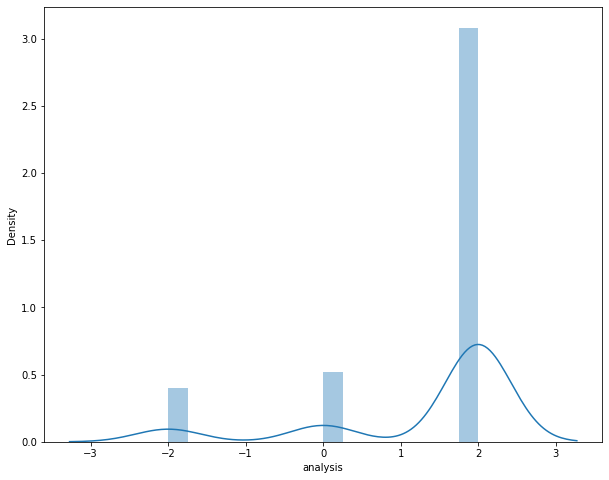

In [45]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(10,8))
sns.distplot(reviews['analysis'])
plt.show()

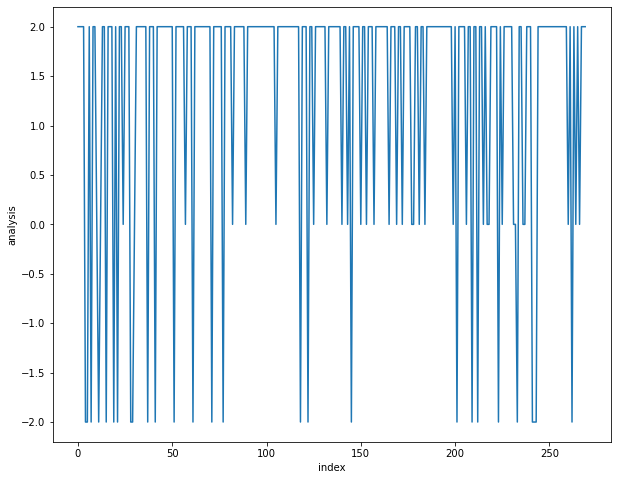

In [46]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(10,8))
sns.lineplot(y='analysis',x='index',data=reviews)
plt.show()

In [47]:
reviews['analysis'].value_counts()

 2    208
 0     35
-2     27
Name: analysis, dtype: int64

In [48]:
#positive comments
((230+33)/290)*100

90.6896551724138

In [49]:
#negative comments
(27/290)*100

9.310344827586208

### So from "Reviews" data only 9% is about the negative comments so the macbook air product received good product reviews of 90.6%, i.e., approx 91% from the users. 